In [44]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('saad.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 300, 300, 3)
x.shape

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='preview', save_prefix='el', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # o

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [46]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'train',  # this is the target directory
        target_size=(300, 300),  # all images will be resized to 300x300
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 210 images belonging to 10 classes.
Found 10 images belonging to 10 classes.


In [47]:
# TRAINING
history=model.fit_generator(
        train_generator,
        steps_per_epoch=400 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

model.save_weights('50_epochs.h5')  # always save your weights after training or during training

Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: -50.1007 - acc: 0.1239 - val_loss: -55.7984 - val_acc: 0.1000
Epoch 2/20
25/25 [==============================] - 46s 2s/step - loss: -58.5040 - acc: 0.0978 - val_loss: -55.7983 - val_acc: 0.1000
Epoch 3/20
25/25 [==============================] - 47s 2s/step - loss: -55.7408 - acc: 0.1220 - val_loss: -55.7984 - val_acc: 0.1000
Epoch 4/20
25/25 [==============================] - 47s 2s/step - loss: -53.3947 - acc: 0.1121 - val_loss: -55.7983 - val_acc: 0.1000
Epoch 5/20
25/25 [==============================] - 44s 2s/step - loss: -57.5225 - acc: 0.0827 - val_loss: -55.7983 - val_acc: 0.1000
Epoch 6/20
25/25 [==============================] - 56s 2s/step - loss: -54.9651 - acc: 0.1264 - val_loss: -55.7983 - val_acc: 0.1000
Epoch 7/20
25/25 [==============================] - 61s 2s/step - loss: -56.1350 - acc: 0.0878 - val_loss: -55.7983 - val_acc: 0.1000
Epoch 8/20
25/25 [==============================] - 59s 2s/ste

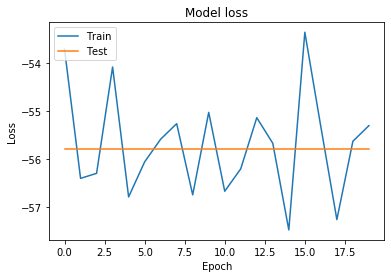

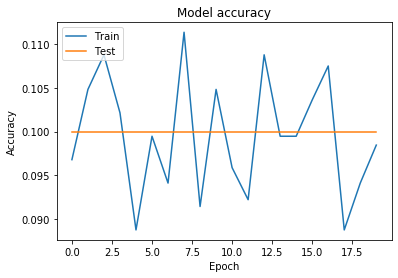

In [50]:
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()
#Accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [49]:
import numpy as np
def img_show(image):
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    plt.imshow(image)
    plt.show()
    return image
def test(model,image_path):
    img = cv2.imread('saad.jpg')
    img = img_show(img)
    img = cv2.resize(img,(224,224))
    img = np.reshape(img,(1,224,224,3))
    img = img/255.0
    prediction = model.predict(img)
    prediction = np.argmax(prediction)
    labels = (validation_generator.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    return labels[prediction]


labels = ( train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'AghaAhmed', 1: 'AhmedAliRaza', 2: 'bilal', 3: 'kamran', 4: 'maaz', 5: 'meer', 6: 'omer_ashraf', 7: 'rafay', 8: 'saad', 9: 'saqib'}
